In [1]:
import numpy as np
import os
from matplotlib import pyplot as plt

In [2]:
def get_energy(lam_vals, alchemical_potentials, nuc_rep, e_homos, dZ, dN, int_rule = 'simp'):
    if int_rule == 'simp':
        mu_I = sc.integrate.simps(alchemical_potentials, lam_vals)
    elif int_rule == 'trapz':
        mu_I = get_alchpot_int(lam_vals, alchemical_potentials)
    e_homo = np.trapz(e_homos, lam_vals)
    
    return((mu_I * dZ).sum() + e_homo*dN + nuc_rep)

def get_alchpot_int(lam_vals, alchpots):
    av_alchpots = []
    for i in range(alchpots.shape[1]):
        mu_I = np.trapz(alchpots[:,i], lam_vals)
        av_alchpots.append(mu_I)
    return(np.array(av_alchpots))

def get_num_occupied(mo_occupancies):
    return(np.where(mo_occupancies != 0)[0].shape[0])
def get_homo(mo_energies, num_occupied):
    mo_energies.sort()
    e_homo = mo_energies[num_occupied-1]
    return(e_homo)
def wrapper_get_e_homos(mo_energies, mo_occupancies):
    e_homos = []
    for moe, moo in zip (mo_energies, mo_occupancies):
        num_occ = get_num_occupied(moo)
        ehomo = get_homo(moe, num_occ)
        e_homos.append(ehomo)
    return(np.array(e_homos))

In [19]:
base = '/home/misa/projects/Atomic-Energies/data/vacuum_reference/qm9_data/dsgdb9nsd_003664'

lam_vals = np.loadtxt(os.path.join(base, 'lam_vals.txt'))
lam_vals = np.concatenate((np.array([0]), lam_vals))

lam_vals = np.concatenate((lam_vals[0:-5], lam_vals[-4:]))

alchpots = np.load(os.path.join(base, 'alchpots.npy'))
zero = np.zeros(shape=(1,alchpots.shape[1]))
alchpots = np.concatenate((zero, alchpots), axis = 0)

alchpots = np.concatenate((alchpots[0:-5], alchpots[-4:]))

mo_energies = np.load(os.path.join(base, 'mo_energies.npy'))
mo_occupancies = np.load(os.path.join(base, 'mo_occupancies.npy'))

e_homos = wrapper_get_e_homos(mo_energies, mo_occupancies)
e_homos = np.concatenate((np.array([0]), e_homos))
e_homos = np.concatenate((e_homos[0:-5], e_homos[-4:]))

deltaZ = np.array([-6., -6., -6., -8., -6., -7., -7., -1., -1., -1., -1., -1., -1.])*(-1)
nuc_rep = 295.8829146919174

e_tot = get_energy(lam_vals, alchpots, nuc_rep, e_homos, deltaZ, 52, int_rule = 'trapz')
e_tot_ref = -338.832955289696

(26, 13)

In [20]:
base = '/home/misa/projects/Atomic-Energies/data/vacuum_reference/qm9_data/dsgdb9nsd_003700'

lam_vals2 = np.loadtxt(os.path.join(base, 'lam_vals.txt'))
lam_vals2 = np.concatenate((np.array([0]), lam_vals2))
lam_vals2 = np.concatenate((lam_vals2[0:-5], lam_vals2[-4:]))

alchpots2 = np.load(os.path.join(base, 'alchpots.npy'))
zero = np.zeros(shape=(1,alchpots2.shape[1]))
alchpots2 = np.concatenate((zero, alchpots2), axis = 0)
alchpots2 = np.concatenate((alchpots2[0:-5], alchpots2[-4:]))

mo_energies2 = np.load(os.path.join(base, 'mo_energies.npy'))
mo_occupancies2 = np.load(os.path.join(base, 'mo_occupancies.npy'))

e_homos2 = wrapper_get_e_homos(mo_energies2, mo_occupancies2)
e_homos2 = np.concatenate((np.array([0]), e_homos2))
e_homos2 = np.concatenate((e_homos2[0:-5], e_homos2[-4:]))

deltaZ2 = np.array([-6., -6., -7., -7., -6., -6., -8., -1., -1., -1., -1., -1., -1.])*(-1)
nuc_rep2 = 296.16228280307075

e_tot2 = get_energy(lam_vals2, alchpots2, nuc_rep2, e_homos2, deltaZ2, 52, int_rule = 'trapz')
e_tot_ref2 = -338.83313291715

In [21]:
e_tot2-e_tot

0.014895348935908714

In [22]:
e_tot_ref2 - e_tot_ref

-0.00017762745403615554

In [48]:
e_homos

array([ 0.        , -0.21315456, -0.21871318, -0.30612959, -0.30467182,
       -0.36572967, -0.29421216, -0.29067443, -0.08645424, -0.14804921,
       -0.19180091, -0.23348217, -0.24759725, -0.24705073, -0.28929068,
       -0.25292794, -0.27014908, -0.30663324, -0.29891229, -0.31755249,
       -0.32762148, -0.36366663, -0.35854755, -0.40948008, -0.3295494 ,
       -0.31364798])

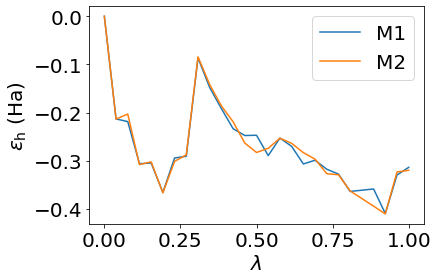

In [52]:
plt.rcParams['font.size'] = 20
plt.plot(lam_vals,e_homos, label='M1')
plt.plot(lam_vals2,e_homos2, label='M2')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\varepsilon_{\rm h}$ (Ha)')
plt.legend()

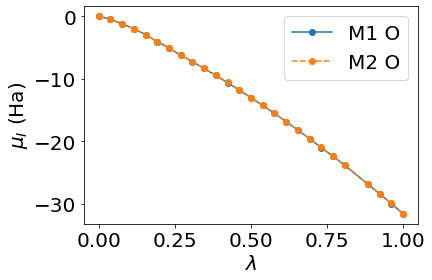

In [45]:
plt.rcParams['font.size'] = 20
plt.plot(lam_vals,alchpots[:,3], '-o', label='M1 O')
plt.plot(lam_vals2,alchpots2[:,6], '--o', label='M2 O')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\mu_I$ (Ha)')
plt.legend()

In [ ]:
deltaZ = np.array([-6., -6., -6., -8., -6., -7., -7., -1., -1., -1., -1., -1., -1.])*(-1)
deltaZ2 = np.array([-6., -6., -7., -7., -6., -6., -8., -1., -1., -1., -1., -1., -1.])*(-1)
